### Visualization
In this notebook, I will try to visualize the major words that are found in Trudeau's speeches.
I will attempt the following:

* Histogram of all positive and negative scores
* Possible visualization of sentiment scores as function of time
* Length of text histogram
* Top words/bigrams/trigrams

Link to possible visualizations: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [23]:
# Importing libraries
from pymongo import MongoClient
from bson.objectid import ObjectId
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

%matplotlib inline

Let's now collect and view the speeches. The general schema of each document that was inputted that was inputted into the database is: 
* ID: Unique ID for each speech
* title
* date
* details: contains the full speech
* compound score, neg_score, neutral_score, pos_score: sentiment scores from VaderSentimentAnalyzer
* bigrams, tokens, trigrams: tokens and ngrams for each speech

In [12]:
# Gathering the data
client = MongoClient("localhost")

db = client.trudeau_speeches
speeches = db.db_speeches

In [ ]:
# Getting list of speech IDs:
for speech in speeches.find():
    print(speech['_id'])

In [35]:
# Function to generate wordcloud
def generate_wordcloud(id):
    speech = speeches.find_one({'_id': ObjectId(id)})
    text = str(speech['details'])
    
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 

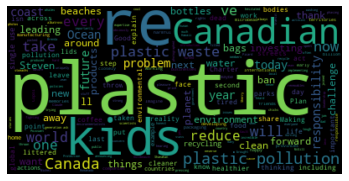

In [36]:
generate_wordcloud('5d23e5bee09f469dac0ffb1b')

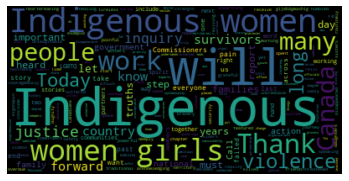

In [37]:
generate_wordcloud('5d23e5bee09f469dac0ffb1c')

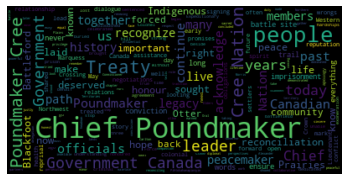

In [38]:
generate_wordcloud('5d23e5bee09f469dac0ffb1d')

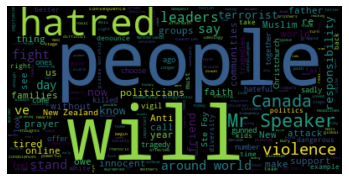

In [39]:
generate_wordcloud('5d23e5bee09f469dac0ffb1e')

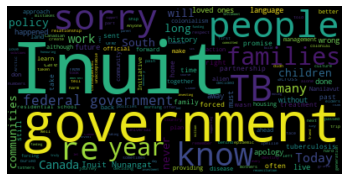

In [40]:
generate_wordcloud('5d23e5bee09f469dac0ffb1f')

(-0.5, 399.5, 199.5, -0.5)

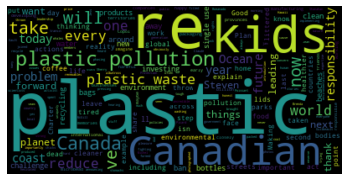

In [44]:
# Making wordcloud for all speeches
all_speeches = []

for speech in speeches.find():
    all_speeches.append(speech['details'])
    
all_text = ''.join(all_speeches)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 

Interesting wordcloud! Seems like many of his speeches are about pollution and plastics!